In [3]:
import numpy as np
import matplotlib.pyplot as plt
from rich.table import Table
from rich import print as rptint
import json
import os
import pandas as pd

### 1. 读取 Dataframe

In [4]:
scenario_name = "CWE-89-SQL-injection"
TIME_PERIOD = 1
TIME_INTERVAL = '1MS'
save_file_path = os.path.join('K:/hids/LID-DS-master/tools/out', scenario_name)

In [5]:
# test_normal_df = pd.read_pickle(os.path.join(save_file_path,  'DF_test_normal.pkl'))
# test_exploit_df = pd.read_pickle(os.path.join(save_file_path, 'DF_test_exploit.pkl'))

test_normal_time_df = pd.read_pickle(os.path.join(save_file_path,  'DF_test_normal_time.pkl'))
test_exploit_time_df = pd.read_pickle(os.path.join(save_file_path, 'DF_test_exploit_time.pkl'))


In [6]:
df_normal = test_normal_time_df[:5000000]
df_exploit = test_exploit_time_df[:5000000]

In [13]:
# test_normal_time_df_1 = round(df_normal / (10 ** 6),2 )
# test_exploit_time_df_1 = round(df_test / (10 ** 6),2)
test_normal_time_df_1 = round(df_normal / (10 ** 6),2 )
test_exploit_time_df_1 = round(df_exploit / (10 ** 6),2)

In [40]:
# (test_normal_time_df_1.value_counts()/ len(test_normal_time_df_1)).to_list()
y1 = (test_normal_time_df_1.value_counts().drop([0.0, 0.01, 0.02, 0.03, 0.04, 0.05,0.06,0.07])).to_list()
y2 = (test_exploit_time_df_1.value_counts().drop([0.0, 0.01, 0.02, 0.03, 0.04, 0.05,0.06,0.07])).to_list()
y2

[2676,
 2489,
 2278,
 1918,
 1896,
 1892,
 1834,
 1641,
 1229,
 974,
 878,
 687,
 512,
 459,
 419,
 322,
 276,
 225,
 218,
 209,
 203,
 163,
 162,
 126,
 120,
 104,
 93,
 90,
 87,
 84,
 84,
 84,
 81,
 79,
 77,
 76,
 75,
 75,
 71,
 68,
 68,
 67,
 66,
 66,
 65,
 65,
 64,
 63,
 62,
 61,
 61,
 60,
 60,
 59,
 58,
 56,
 54,
 53,
 53,
 53,
 52,
 52,
 51,
 51,
 51,
 50,
 48,
 47,
 46,
 45,
 45,
 44,
 44,
 43,
 40,
 39,
 38,
 38,
 36,
 36,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,


In [41]:
test_normal_time_df_1.value_counts().drop([0.0, 0.01, 0.02, 0.03, 0.04, 0.05])

0.06      8586
0.07      4253
0.08      2860
0.11      2666
0.10      2257
          ... 
31.43        1
40.87        1
108.11       1
31.07        1
227.91       1
Length: 9389, dtype: int64

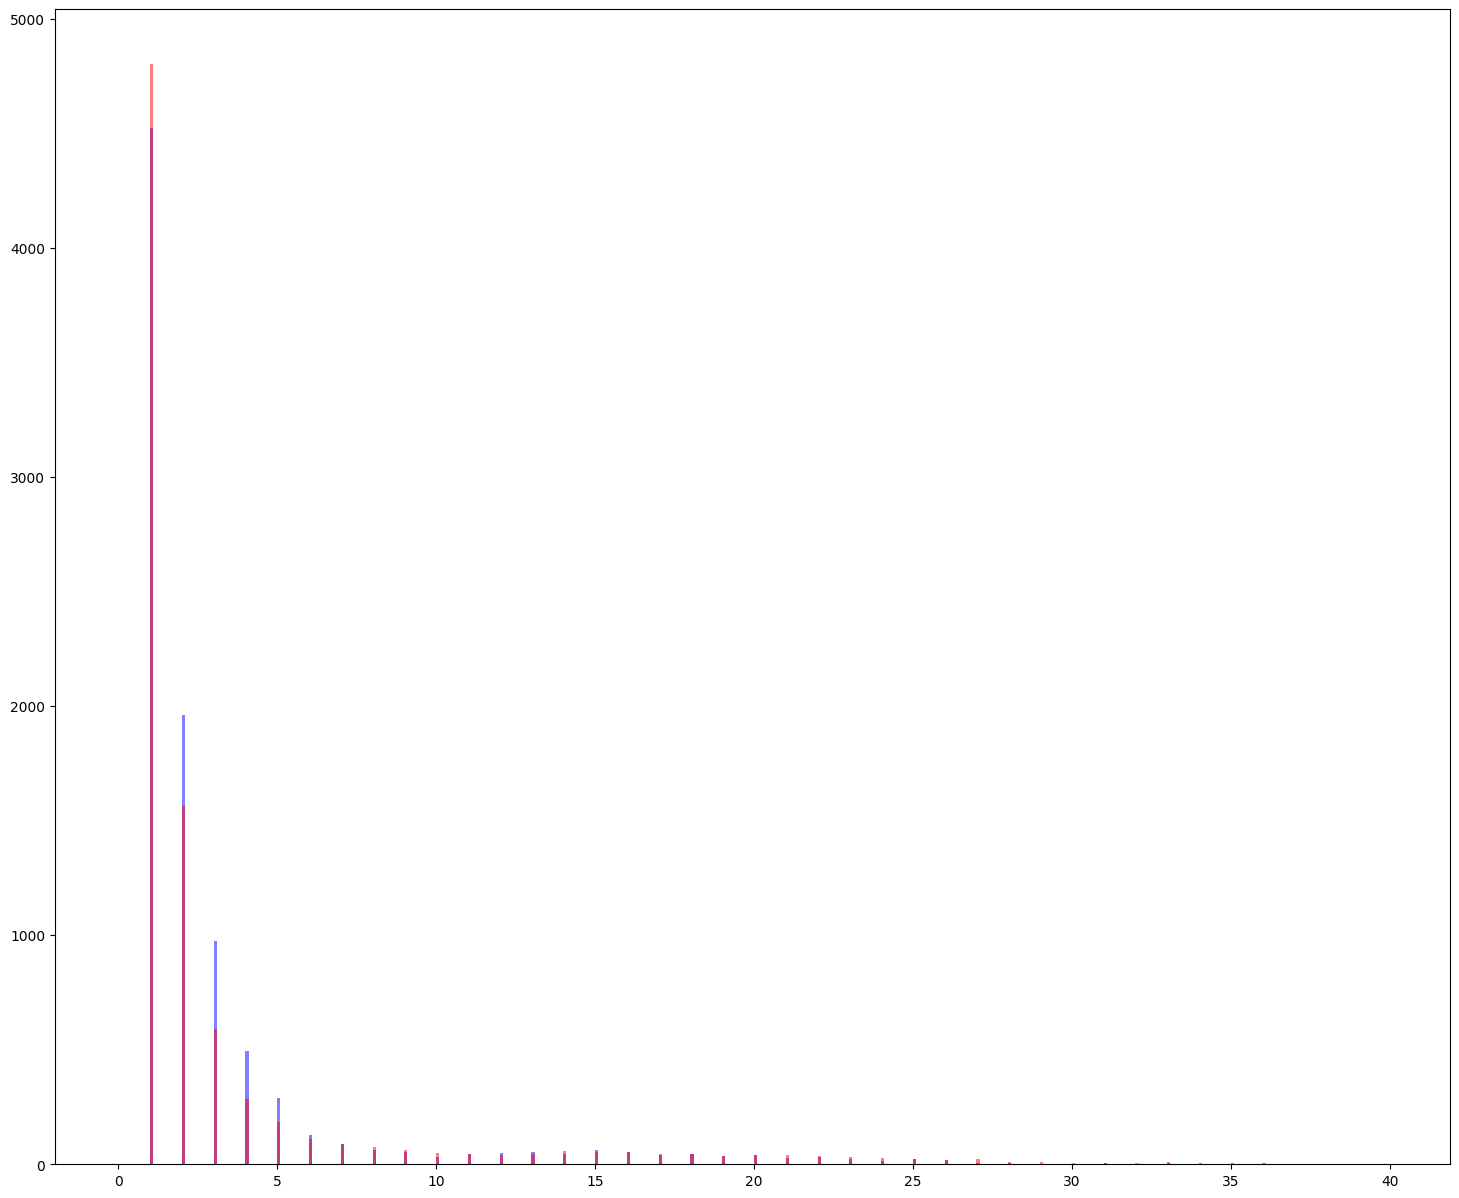

In [44]:

plt.figure(figsize=(18,15))
bins = np.arange(0, 40, 0.1)

plt.hist(y1, bins=bins, alpha = 0.5, color='b')
plt.hist(y2,  bins=bins, alpha = 0.5, color='r')

plt.show()

时间间隔，异常与正常区别，时间多，时间长

字典读取

In [19]:

if  os.path.exists(save_file_path) is not True:
    print('path %s not exist' % save_file_path)

with open(os.path.join(save_file_path, 'test_sc_num_persec_' + str(TIME_PERIOD)),'r') as f:
    test_sc_num_persec = json.load(f)

with open(os.path.join(save_file_path, 'test_sc_time_interval_persec_' + str(TIME_PERIOD)),'r') as f:
    test_sc_time_interval_persec = json.load(f)

with open(os.path.join(save_file_path, 'test_sc_num_nor_attack'),'r') as f:
    test_sc_num_nor_attack = json.load(f)

### 1. 分析每秒钟系统调用次数

选择 Test 中 NORMAL and ATTACK 交集， 展示所有 syscall

In [20]:
NORMAL = 'NORMAL'
ATTACK = 'ATTACK'

x_data_labels = test_sc_num_nor_attack[NORMAL].keys() & test_sc_num_nor_attack[ATTACK].keys()

x_axis_data=[i for i in range(len(x_data_labels))]


 系统调用名作为横轴，每秒频率作为纵轴，画点图，查看图片

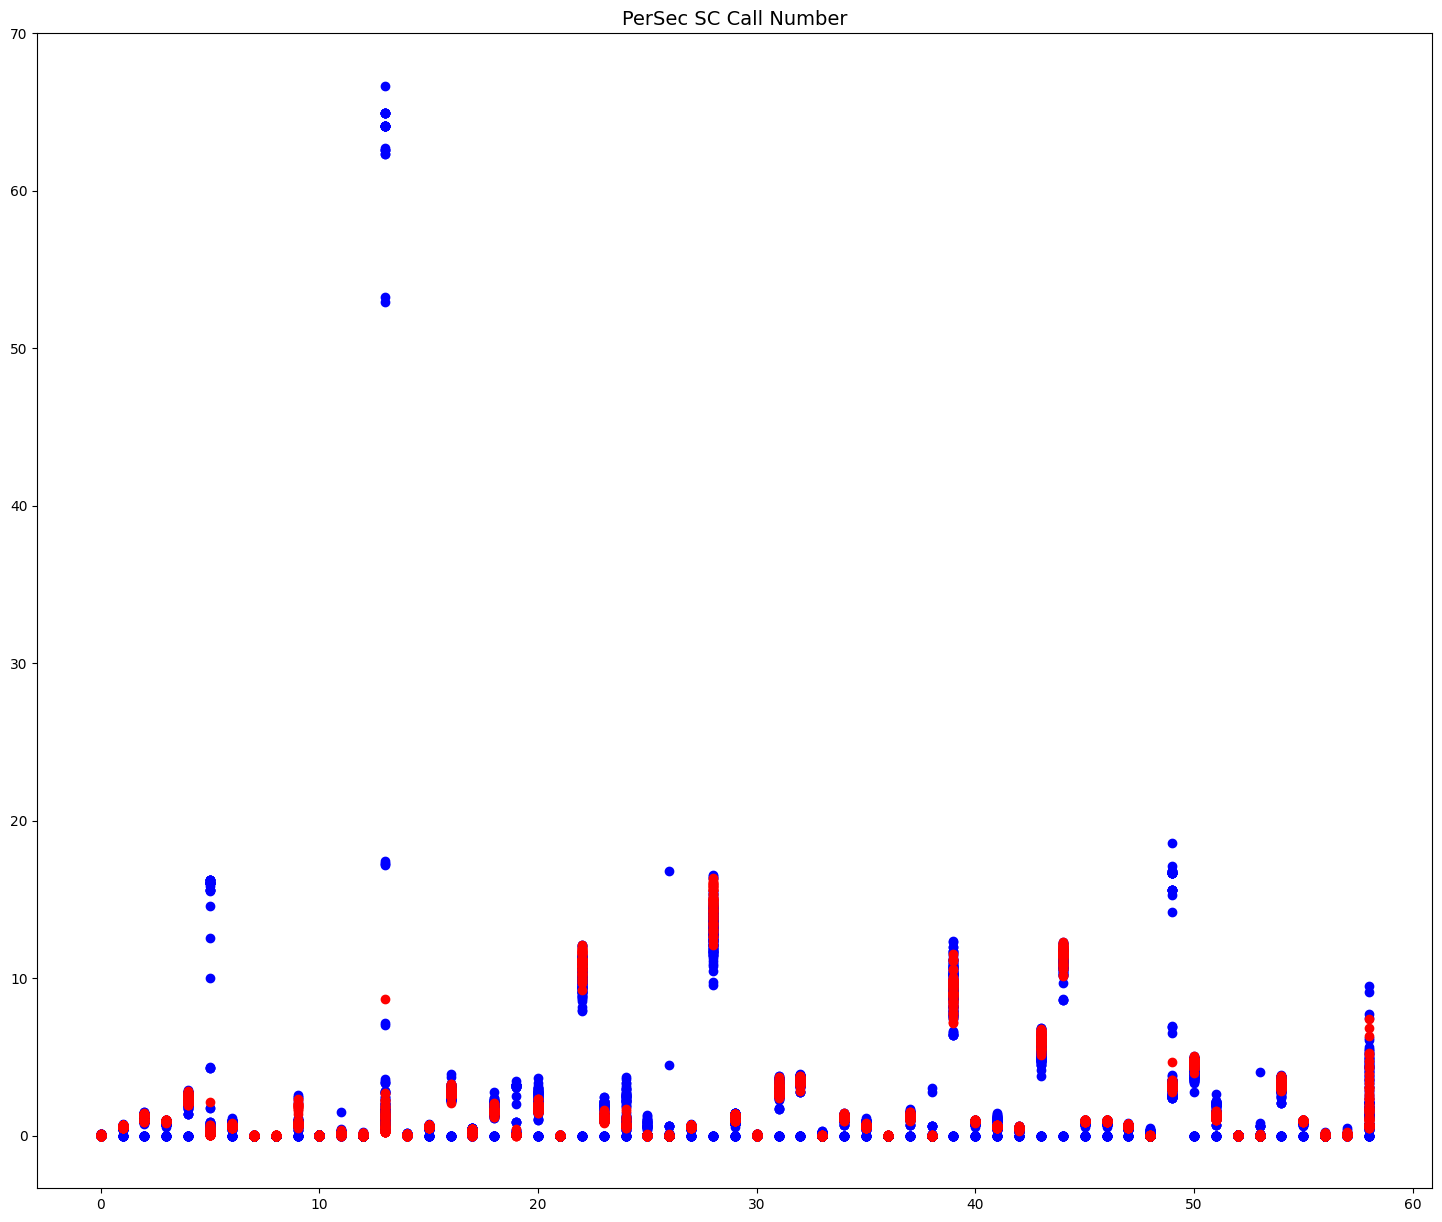

In [27]:
plt.figure(figsize=(18,15))

plt.title("PerSec SC Call Number", fontsize=14)

# traverse the list test_sc_num_persec[NORMAL]
for dic in test_sc_num_persec[NORMAL]:
    total = sum(dic.values())
    for key, val in dic.items():
        dic[key] = round(val/total * 100, 2)
    y = [dic[key]  if key in dic.keys() else 0 for key in x_data_labels]
    plt.scatter(x_axis_data, y, c='b')

for dic in test_sc_num_persec[ATTACK]:
    total = sum(dic.values())
    for key, val in dic.items():
        dic[key] = round(val/total * 100, 2)
    y = [dic[key]  if key in dic.keys() else 0 for key in x_data_labels]
    plt.scatter(x_axis_data, y, c='r')

plt.savefig(os.path.join(save_file_path, "./syscall_num_persec_dot_plot_" + str(TIME_PERIOD) + ".jpg"))W

plt.show()

画折线图

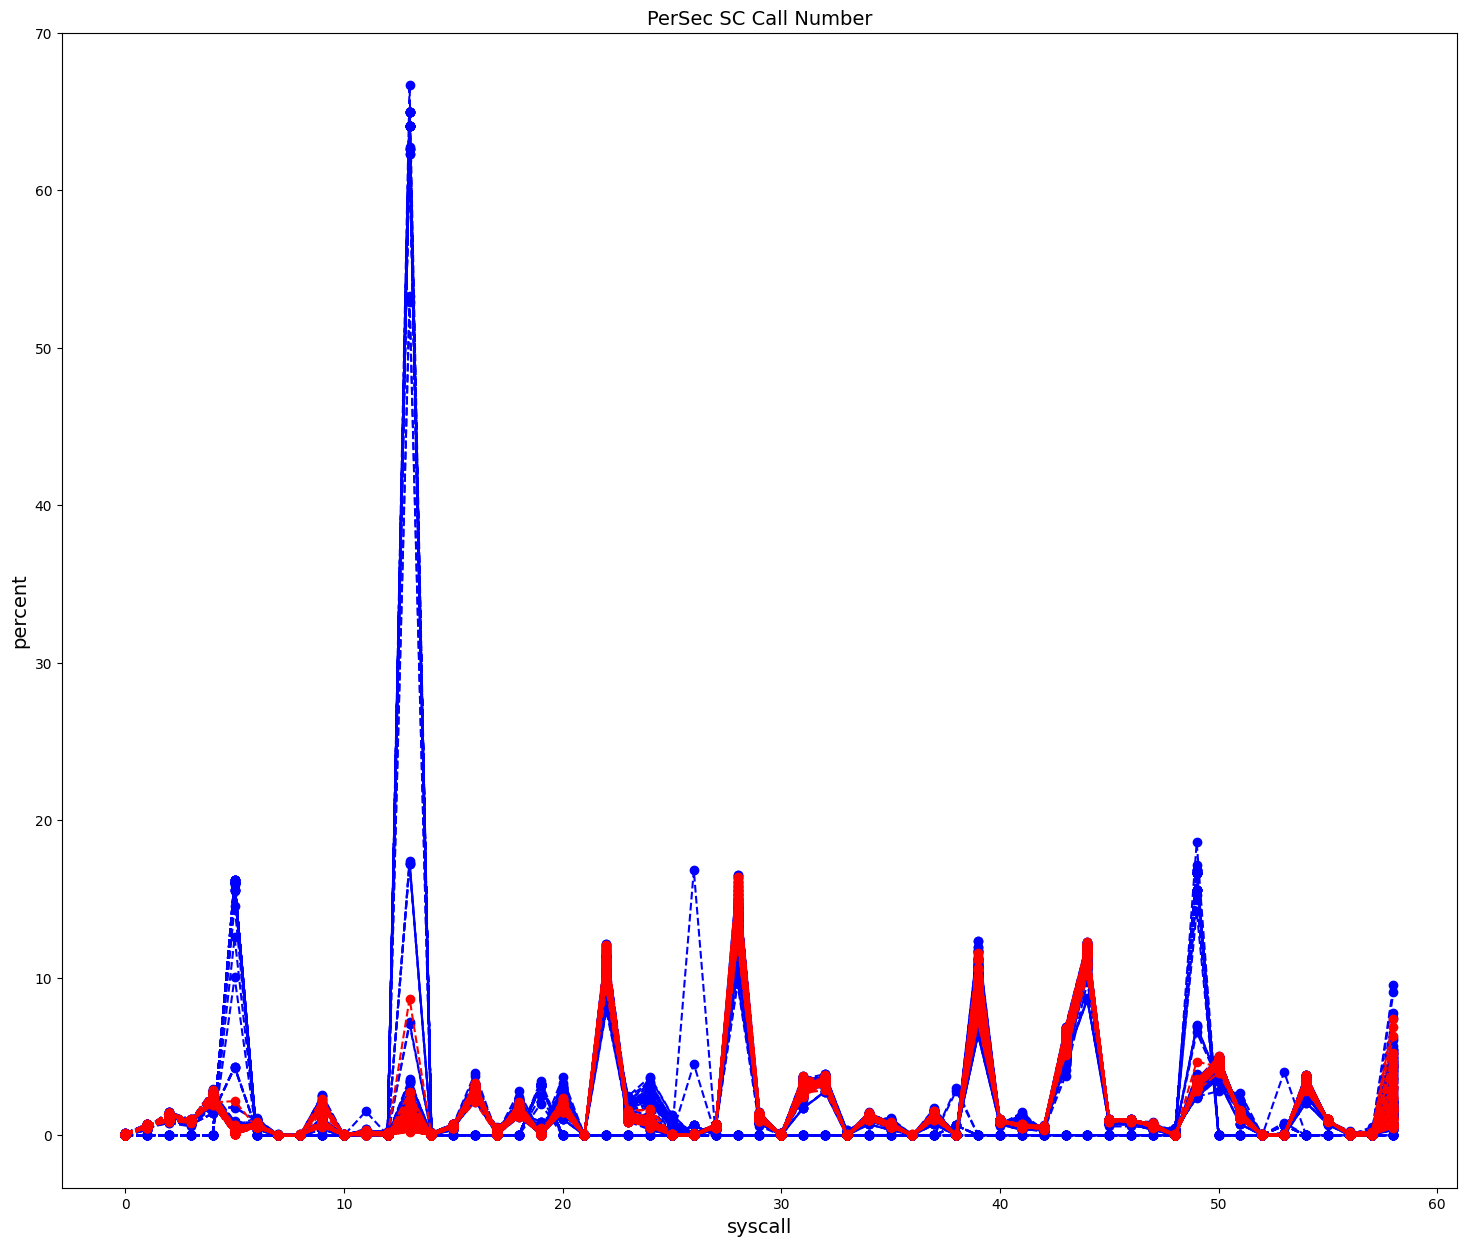

In [28]:

plt.figure(figsize=(18,15))

plt.title("PerSec SC Call Number", fontsize=14)

# traverse the list test_sc_num_persec[NORMAL]
for dic in test_sc_num_persec[NORMAL]:
    total = sum(dic.values())
    for key, val in dic.items():
        dic[key] = round(val/total * 100, 2)
    y = [dic[key]  if key in dic.keys() else 0 for key in x_data_labels]
    plt.plot(x_axis_data, y, 'bo--')

for dic in test_sc_num_persec[ATTACK]:
    total = sum(dic.values())
    for key, val in dic.items():
        dic[key] = round(val/total * 100, 2)
    y = [dic[key]  if key in dic.keys() else 0 for key in x_data_labels]
    plt.plot(x_axis_data, y, 'ro--')

plt.xlabel('syscall', fontsize=14)
plt.ylabel('percent', fontsize=14)
plt.savefig(os.path.join(save_file_path, "./syscall_num_persec_line_chart_" + str(TIME_PERIOD) + ".jpg"))

plt.show()

### 2. 分析时间间隔分布

分析有没有大时间块的现象，由于1ms 内的数据很大，所以分两个图，一个图比较1ms 内的，一个比较大于 1ms 的

散点图,大于 1ms的数据

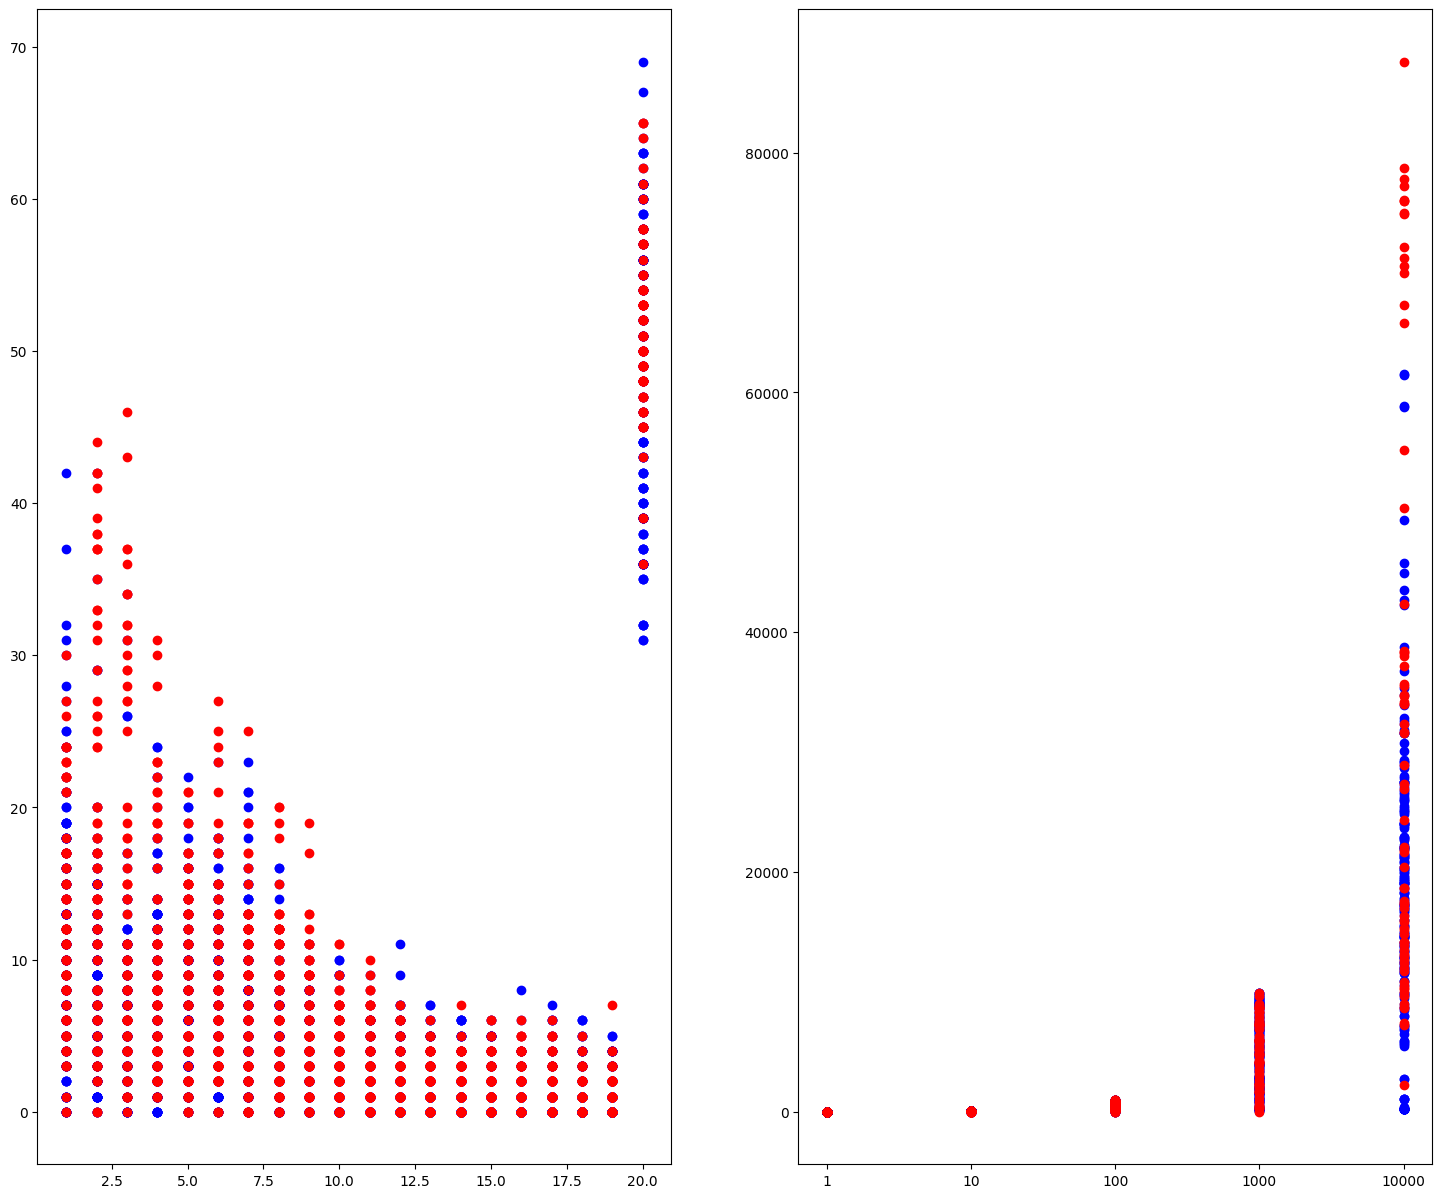

In [58]:
# test_sc_time_interval_persec
# x_labels 1 - 20
x_labels = [i for i in range(1, 21)]

plt.figure(figsize=(18,15))

plt.title("PerSec SC Call Interval", fontsize=14)

plt.subplot(121)
# traverse the list test_sc_num_persec[NORMAL]
for lis in test_sc_time_interval_persec[NORMAL]:
    y = [i for i in lis[1:]]
    plt.scatter(x_labels, y, c='b')

for lis in test_sc_time_interval_persec[ATTACK]:
    y = [i for i in lis[1:]]
    plt.scatter(x_labels, y, c='r')

# The abscissa x_labels is divided into four categories: one, ten, hundred, thousand, ten thousand
x_labels = ['1', '10', '100', '1000', '10000']

# 1ms 以内的比较
plt.subplot(122)
for lis in test_sc_time_interval_persec[NORMAL]:
    y = [lis[0] % 10, lis[0] % 100, lis[0] % 1000, lis[0] % 10000, lis[0] % 100000]
    plt.scatter(x_labels, y, c='b')

for lis in test_sc_time_interval_persec[ATTACK]:
    y = [lis[0] % 10, lis[0] % 100, lis[0] % 1000, lis[0] % 10000, lis[0] % 100000]
    plt.scatter(x_labels, y, c='r')

plt.savefig(os.path.join(save_file_path, "./syscall_interval_persec_dot_plot" + TIME_INTERVAL + "_" + str(TIME_PERIOD) + ".jpg"))

plt.show()

未发现明显特征